### Precision Recall Curve
A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

#### When to use PR AUC? Ref
- when you want to communicate precision/recall decisions to other stakeholders
- when you want to choose the threshold that fits the business problem.
- when your data is heavily imbalanced. As mentioned before, it was discussed extensively in this article by Takaya Saito and Marc Rehmsmeier. The intuition is the following: since PR AUC focuses mainly on the positive class (PPV and TPR) it cares less about the frequent negative class.
- when you care more about positive than negative class. If you care more about the positive class and hence PPV and TPR you should go with the Precision-Recall curve and PR AUC (average precision).

#### Area Under Curve 
- like the AUC, summarizes the integral or an approximation of the area under the precision-recall curve.
- In terms of model selection, F-Measure summarizes model skill for a specific probability threshold (e.g. 0.5), whereas the area under curve summarizes the skill of a model across thresholds, like ROC AUC

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class PRAUCv2:
    def __init__(self, probabilities: np.array, labels: np.array, thresholds: np.array):
        assert(len(predictions) == len(labels)), "lens of pred and labels doesn't match!"
        self.probabilities = probabilities
        self.labels = labels
        self.thresholds = thresholds
    
    def calc_precision_recall(self, predictions):
        """
        calc the precision and recall score based on the given predictions
        """
        prediction_list = list(predictions)
        label_list = list(self.labels)
        
        tp, fp, fn = 0, 0, 0
        for pred, label in zip(prediction_list, label_list):
            if pred == label == 1:
                tp += 1
            if pred == 1 and label != pred:
                fp += 1
            if pred == 0 and label != pred:
                fn += 1
        
        try:
            precision = tp/(tp+fp)
        except:
            precision = 1
        
        try:
            recall = tp/(tp+fn)
        except:
            recall = 1
        
        return precision, recall
    
    def calc_precision_recall_curve(self):
        # Containers for true positive / false positive rates
        precision_scores = []
        recall_scores = []
        for thres in self.thresholds:
            predictions = []
            for prob  in self.probabilities:
                if prob > thres:
                    predictions.append(1)
                else:
                    predictions.append(0)
                    
            precision, recall = self.calc_precision_recall(predictions)
        
            precision_scores.append(precision)
            recall_scores.append(recall)
        return np.array(precision_scores), np.array(recall_scores)
    
    def plot(self, prec, rec):
        prec_list = list(prec)
        rec_list = list(rec)
        plt.plot(rec_list, prec_list)
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("PR Curve - AUC")
        plt.show()

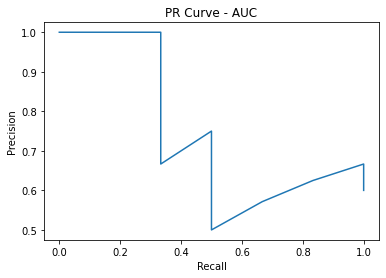

In [20]:
probabilities = [0.65,0.1,0.15,0.43,0.97,0.24,0.82,0.7,0.32,0.84]
labels = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
probability_thresholds = np.linspace(0, 1, num=100)
pr_auc = PRAUCv2(probabilities, labels, probability_thresholds)
prec, rec = pr_auc.calc_precision_recall_curve()
pr_auc.plot(prec, rec)

In [3]:
# Area Under Precision-Recall Curve (PR-AUC)
# https://towardsdatascience.com/how-to-efficiently-implement-area-under-precision-recall-curve-pr-auc-a85872fd7f14
#  Rank Prediction Label  TP(cumsum) Precision(TP/Rank) Recall(TP/#num)
#   1    0.97        1      1            1.0                0.167
#   2    0.84        1      2            1.0                0.333
#   3    0.82        0      2            0.667              0.333  
#   4    0.7         1      3            0.75               0.500
class PRAUC:
    def __init__(self, predictions: np.array, labels: np.array):
        assert(len(predictions) == len(labels)), "lens of pred and labels don't match"
        self.predictions = predictions
        self.labels = labels
        
    def calc_PR(self):
        # sort the entries according to the predicted confidence
        idx = np.argsort(self.predictions)[::-1]
        predictions = self.predictions[idx]
        # labels is either 0 or 1
        labels = self.labels[idx]

        # calculate cum sum of labels
        cumsum = np.cumsum(labels)
        # rank is the index starting from 1, and can be used to indicate how many estimations are generated
        rank = np.arange(len(predictions)) + 1
        # total number of ground truth
        num_gts = cumsum[-1]
        prec = cumsum / rank
        rec = cumsum / num_gts
        return prec, rec
        
    def plot(self, prec, rec):
        prec_list = list(prec)
        rec_list = list(rec)
        plt.plot(rec_list, prec_list)
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("PR Curve - AUC")
        plt.show()

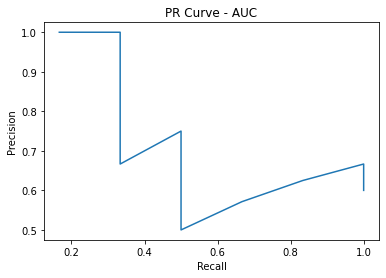

In [4]:
probabilities = np.array([0.65,0.1,0.15,0.43,0.97,0.24,0.82,0.7,0.32,0.84])
labels = np.array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1])
pr_auc = PRAUC(probabilities, labels)
prec, rec = pr_auc.calc_PR()
pr_auc.plot(prec, rec)